In [58]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [59]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
train_id = train_df['PassengerId'].values
test_id = test_df['PassengerId'].values

In [61]:
all_df = train_df.append(test_df).set_index('PassengerId')

C:\Users\46861\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [62]:
all_df

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,NaN,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,NaN,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,NaN,SOTON/O.Q. 3101262


In [63]:
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})

In [64]:
all_df["Age"].fillna(all_df.groupby("Pclass")["Age"].transform("mean"), inplace=True)

In [65]:
all_df["cabin_count"] = all_df["Cabin"].map(lambda x : len(x.split()) if type(x) == str else 0)

In [66]:
all_df

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,cabin_count
PassengerId,,,,,,,,,,,,
1,22.000000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171,0
2,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599,1
3,26.000000,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,0
4,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803,1
5,35.000000,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0,373450,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,24.816367,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,0,0,NaN,A.5. 3236,0
1306,39.000000,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,1,0,NaN,PC 17758,1
1307,38.500000,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,0,0,NaN,SOTON/O.Q. 3101262,0


In [67]:
all_df["cabin_count"].unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [68]:
all_df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [69]:
def transform_status(x):
    if "Mrs" in x or "Ms" in x:
        return "Mrs" 
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"
all_df["social_status"] = all_df["Name"].map(lambda x :transform_status(x))

In [70]:
all_df["social_status"].value_counts()

Mr        758
Miss      258
Mrs       203
Master     61
0           9
Dr          8
Rev         8
Col         4
Name: social_status, dtype: int64

In [71]:
all_df[all_df["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,1,0,1.0,113572,1,Miss
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,1,0,1.0,113572,1,Mrs


In [72]:
import numpy as np
all_df = all_df.drop([62,830]) 

In [73]:
train_id =np.delete(train_id, [62-1,830-1])

In [74]:
all_df[all_df.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
 all_df["cabin_type"] = all_df["Cabin"].map(lambda x : x[0] if type(x) == str else "99")

In [76]:
del all_df["Cabin"]
del all_df["Name"]
del all_df["Ticket"]

In [77]:
y = all_df.loc[train_id, "Survived"].values
del all_df["Survived"]

In [78]:
X_df = pd.get_dummies(all_df)
X = X_df.values

In [79]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X)
X = minmax_scaler.transform(X)

In [80]:
X_train = X[:len(train_id)]
X_test = X[len(train_id):]

NameError: name 'plt' is not defined

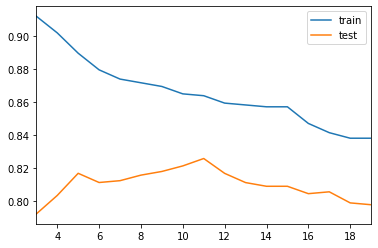

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
test_accuracy = []
train_accuracy = []
for idx in range(3, 20):
    df = DecisionTreeClassifier(min_samples_leaf=idx)
    acc = cross_val_score(df, X_train, y, scoring="accuracy", cv=5).mean()
    train_accuracy.append(accuracy_score(df.fit(X_train, y).predict(X_train), y))
    test_accuracy.append(acc)
result = pd.DataFrame(train_accuracy, index=range(3,20), 
columns=["train"])
result["test"] = test_accuracy
result.plot()
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
algorithmes = [LogisticRegression(), DecisionTreeClassifier()]

In [ ]:
c_params = [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]
params = []

In [ ]:
params.append([{"solver" : ["saga"],"penalty" : ["l1"],"C" : c_params},
               {"solver" : ['liblinear'],"penalty" : ["l2"],"C" : c_params}])
params.append({"criterion" : ["gini", "entropy"],
               "max_depth" : [10,8,7,6,5,4,3,2],"min_samples_leaf": [1,2,3,4,5,6,7,8,9]})

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score
scoring = ['accuracy']
estimator_results = []
for i, (estimator, params) in enumerate(zip(algorithmes,params)):
    gs_estimator = GridSearchCV(refit="accuracy",estimator=estimator,param_grid=params, 
                                scoring=scoring, cv=5, verbose=1, n_jobs=4)
    gs_estimator.fit(X_train, y)
    estimator_results.append(gs_estimator)

In [ ]:
estimator_results[0].best_score_

In [82]:
estimator_results[1].best_score_

0.8357705286839145

In [83]:
from pandas import DataFrame
from collections import defaultdict

In [84]:
result_df_dict = {}
result_attributes = ["model", "accuracy", "penalty", "solver", "C", 
                     "criterion", "max_depth", "min_samples_leaf"]
result_dict = defaultdict(list)
algorithm_name= ["LogisticRegression","DecisionTreeClassifier"]

In [85]:
for i, estimators in enumerate(estimator_results):
    number_of_estimators = len(estimators.cv_results_["mean_fit_time"])

In [86]:
for idx_estimator in range(number_of_estimators):
    result_dict["model"].append(algorithm_name[i])

In [87]:
result_dict["accuracy"].append(estimators.cv_results_["mean_test_accuracy"][idx_estimator])

In [88]:
for param_value in estimators.cv_results_["params"]:
    for k,v in param_value.items():
        result_dict[k].append(v)
for attr_name in result_attributes:
    if len(result_dict[attr_name]) < len(result_dict["accuracy"]):
        result_dict[attr_name].extend([None for i in range(number_of_estimators)])

In [89]:
result_attributes

['model',
 'accuracy',
 'penalty',
 'solver',
 'C',
 'criterion',
 'max_depth',
 'min_samples_leaf']

In [90]:
type(result_dict)

collections.defaultdict

In [91]:
result_dict

defaultdict(list,
            {'model': ['DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
              'DecisionTreeClassifier',
             

In [95]:
result_df = DataFrame(result_dict, columns = result_attributes)

ValueError: arrays must all be same length

In [93]:
result_df.sort_values("accuracy",ascending=False).head(n=10)

NameError: name 'result_df' is not defined

In [96]:
coef =estimator_results[1].best_estimator_.feature_importances_
coef.argsort()[::-1]

array([15,  1,  3,  0,  4, 18, 11,  2,  5,  6,  7,  8,  9, 10, 26, 12, 25,
       14, 16, 17, 19, 20, 21, 22, 23, 24, 13], dtype=int64)

In [98]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24573 sha256=e6ceed88a8aec8d0857ff80d25f9c0bdb058918acda262967f1addce265fd0a0
  Stored in directory: C:\Users\46861\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [ ]:
import 